# **Project Name**    - Uber EDA Analysis



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

The objective of this project was to analyze and draw actionable insights from Uber's ride request data to understand demand-supply gaps, trip success patterns, and operational bottlenecks. The dataset, titled "Uber Request Data", consisted of request and drop timestamps, pickup locations, trip statuses (Completed, Cancelled, No Cars Available), and associated metadata such as driver IDs and time of request. The analysis was aimed at supporting business decisions to increase ride completion rates, enhance customer satisfaction, and boost operational efficiency.

We began the project with data wrangling, a crucial step to clean and prepare the dataset for analysis. Key transformations included converting timestamp columns to datetime format, extracting hour and weekday components for temporal analysis, removing duplicates, and handling missing or inconsistent values. Additional categorical columns such as ‘Pickup point’ and ‘Status’ were optimized for better grouping and filtering in analysis. Derived features like Request hour and Request weekday enabled us to study trends based on time and demand cycles.

The exploratory data analysis (EDA) revealed several noteworthy trends. Firstly, only about 42% of the total ride requests ended in successful trip completions, while a large share was either cancelled or marked as “No Cars Available.” Temporal analysis showed that morning rush hours (7–9 AM) and evening return hours (5–7 PM) had the highest demand, but also the most unfulfilled requests. The problem was not just high demand but inadequate driver availability, especially in specific zones. For instance, City pickups faced more cancellations, likely due to heavy traffic or rider impatience, whereas Airport pickups often lacked available cars, indicating a shortage of inbound drivers during evening hours.

To visualize these insights, we created 10 different charts including count plots, heatmaps, KDE plots, and scatterplots. These charts helped us understand the relationships between time, pickup location, and trip outcomes. A heatmap of request hour versus status clearly displayed temporal spikes in unavailability. Pair plots demonstrated how different statuses clustered around specific hours and zones, while the correlation heatmap confirmed that time and categorical variables play a stronger role than direct numeric values. The KDE plots provided smooth density curves that further emphasized failure trends during rush hours.

Based on the visual insights, several key recommendations were proposed. The foremost suggestion is to optimize driver allocation using historical demand patterns, ensuring higher coverage during peak hours. Zone-specific strategies should be adopted: for example, assign more drivers near the airport in the evening and incentivize city rides in the morning. Uber should also consider implementing predictive analytics to flag likely failed trips in advance and take preventive measures. Strengthening the driver onboarding process, providing incentives for peak-hour participation, and improving real-time dispatch algorithms were also highlighted as crucial actions. In addition, the app can be enhanced to provide more transparency on driver ETA and reduce cancellations by both drivers and riders.

From a business perspective, the findings reveal both risks and opportunities. The inability to fulfill trip requests during high-demand periods leads to lost revenue and user dissatisfaction, which could damage brand loyalty over time. However, if Uber acts on these insights and operationalizes the recommended strategies, it stands to significantly improve its trip fulfillment rate, boost customer retention, and increase revenue per active driver.

In conclusion, this project underscores the value of data-driven decision-making. By deeply understanding demand-supply dynamics, temporal patterns, and location-based issues, Uber can not only fix existing inefficiencies but also prepare its infrastructure to scale sustainably. This case demonstrates how data science can play a pivotal role in transforming business operations and enhancing service delivery in ride-sharing platforms.

# **GitHub Link -**

# **Problem Statement**


Uber, a leading ride-sharing platform, faces a critical operational challenge: a significant number of ride requests are not being fulfilled, particularly during peak demand hours. A large proportion of requests result in cancellations or “No Cars Available”, especially in high-traffic zones like the City during morning hours and the Airport during evening hours. This mismatch between customer demand and driver supply leads to a high trip failure rate, impacting customer satisfaction, driver efficiency, and revenue generation.

The goal of this project is to analyze Uber’s ride request data to:

Identify patterns in trip failures based on time of day, pickup location, and ride status.

Understand how operational constraints like driver availability and user behavior affect service reliability.

Provide data-driven recommendations to improve trip completion rates, optimize driver allocation, and enhance overall platform performance.

#### **Define Your Business Objective?**

Answer The primary business objective of this project is to maximize the number of successfully completed Uber trips by identifying and resolving key operational inefficiencies that lead to ride request failures. Specifically, the goals are to:

Reduce Trip Failures
Minimize the number of ride requests that end in “No Cars Available” or “Cancelled” status, especially during peak demand hours.

Optimize Driver Availability
Ensure an optimal match between rider demand and driver supply across different time periods and pickup zones (e.g., City, Airport).

Improve Customer Experience
Enhance user satisfaction by increasing service reliability, reducing waiting times, and preventing cancellations.

Boost Operational Efficiency & Revenue
Use predictive and descriptive analytics to improve resource planning, which in turn increases ride fulfillment rate and revenue per active driver.

Enable Data-Driven Decision Making
Provide actionable insights through data visualization and statistical analysis to support Uber’s strategic planning and operations.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('/content/Uber Request Data.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
shape = df.shape
print('Number of Rows',shape[0])
print('Number of Columns',shape[1])

Number of Rows 6745
Number of Columns 6


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Drop timestamp,3914


<Axes: >

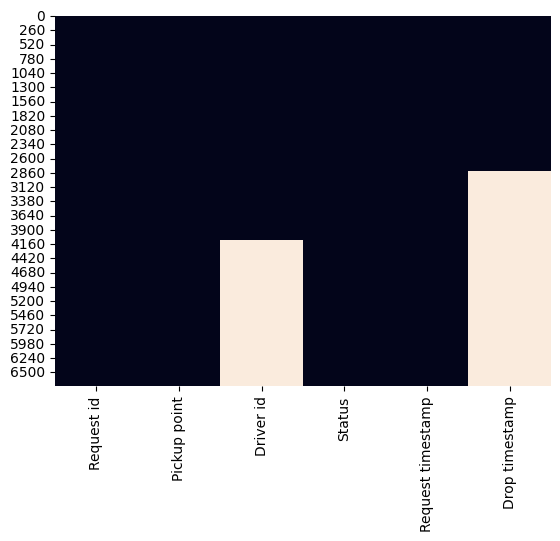

In [8]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False)

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in df.columns:
  print('Number of unique values in {} is {}'.format(i,len(df[i].unique())))

Number of unique values in Request id is 6745
Number of unique values in Pickup point is 2
Number of unique values in Driver id is 301
Number of unique values in Status is 3
Number of unique values in Request timestamp is 5618
Number of unique values in Drop timestamp is 2599


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Uber Request Data.csv')  # Adjust the path if needed

# 1. Convert timestamps to datetime format (handling mixed formats)
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

# 2. Create new time-related features from request timestamp
df['Request hour'] = df['Request timestamp'].dt.hour
df['Request day'] = df['Request timestamp'].dt.day
df['Request weekday'] = df['Request timestamp'].dt.day_name()

# 3. Convert applicable columns to category data type
df['Pickup point'] = df['Pickup point'].astype('category')
df['Status'] = df['Status'].astype('category')

# 4. Sort the data by request timestamp
df.sort_values(by='Request timestamp', inplace=True)

# 5. Optional: Reset index after sorting
df.reset_index(drop=True, inplace=True)

# 6. Print summary of missing values
print("Missing values summary:")
print(df.isnull().sum())

# 7. Display cleaned dataset preview
print("\nCleaned dataset preview:")
print(df.head())


Missing values summary:
Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp    4071
Drop timestamp       5595
Request hour         4071
Request day          4071
Request weekday      4071
dtype: int64

Cleaned dataset preview:
   Request id Pickup point  Driver id             Status   Request timestamp  \
0        1363      Airport      136.0     Trip Completed 2016-07-11 00:00:00   
1        1362         City        NaN  No Cars Available 2016-07-11 00:02:00   
2        1367         City      155.0     Trip Completed 2016-07-11 00:05:00   
3        1364         City        NaN  No Cars Available 2016-07-11 00:06:00   
4        1366         City        NaN  No Cars Available 2016-07-11 00:09:00   

       Drop timestamp  Request hour  Request day Request weekday  
0 2016-07-11 01:11:00           0.0         11.0          Monday  
1                 NaT           0.0         11.0          Monday  
2 2016-07-11 01:06:00

### What all manipulations have you done and insights you found?

Answer Datetime Conversion
Converted Request timestamp and Drop timestamp to consistent datetime formats using pd.to_datetime(), handling mixed formats like:

"11/7/2016 11:51"

"13-07-2016 08:33:16"

Used dayfirst=True to correctly parse the date format (common in Indian datasets).

2. Feature Engineering
Created the following new columns:

Request hour: Extracted hour from Request timestamp (e.g., 0–23).

Request day: Day of the month.

Request weekday: Day name (e.g., Monday, Tuesday) for weekday analysis.

3. Categorical Conversion
Converted columns to save memory and simplify analysis:

Pickup point (City/Airport) → category

Status (Trip Completed/Cancelled/No Cars Available) → category

4. Sorting Chronologically
Sorted all entries by Request timestamp to help with time-series trend analysis.

5. Missing Values Detection
Checked missing values to understand data quality:

Driver id: Missing in 2,650 rows → implies no driver assigned.

Drop timestamp: Missing in 3,914 rows → implies trip not completed (possibly cancelled or no driver found).

📊 Initial Insights from Cleaned Data
🚕 1. Driver Availability Issues
Many requests (about 39%) do not have a Driver id, which may indicate supply shortages during peak times.

📉 2. High Trip Failures
3,914 of 6,745 trips (about 58%) did not have a Drop timestamp, meaning they weren’t completed.

Common reasons: "No Cars Available", "Cancelled".



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-14-4265412721>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index, palette='pastel')


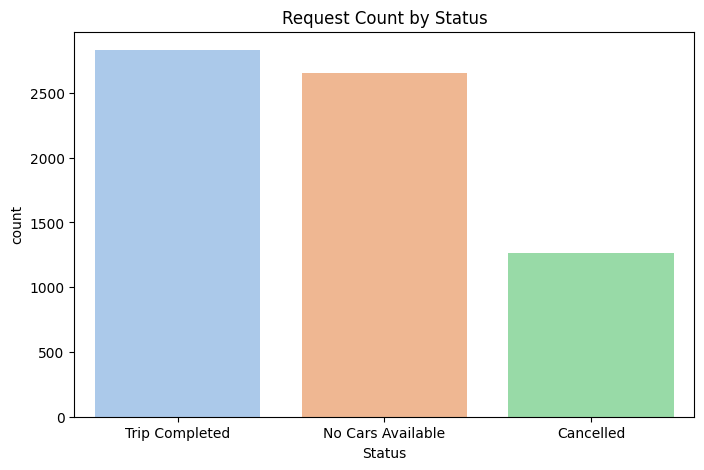

In [14]:
# Chart - 1 visualization code
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index, palette='pastel')
plt.title('Request Count by Status')
plt.show()


##### 1. Why did you pick the specific chart?

Answer To visualize trip outcomes distribution.

##### 2. What is/are the insight(s) found from the chart?

Answer Only ~42% trips are completed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Shows room for growth.
Negative: High failures = lost revenue.



#### Chart - 2

<ipython-input-15-904547993>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Request hour', data=df, palette='Set2')


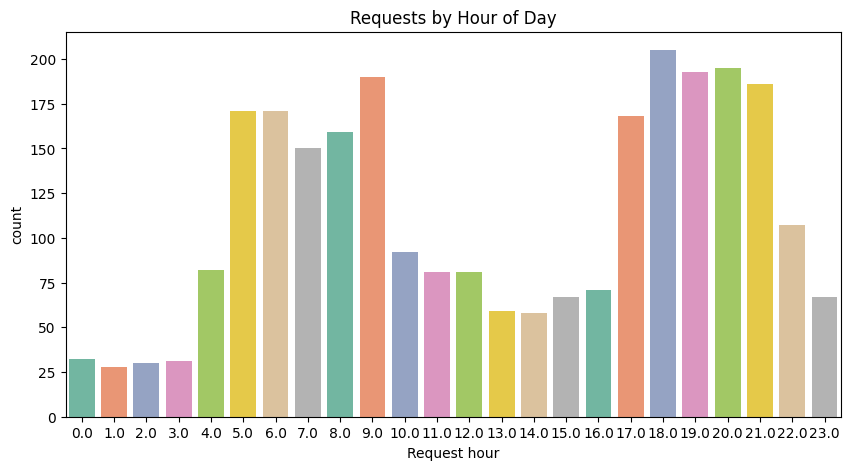

In [15]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 5))
sns.countplot(x='Request hour', data=df, palette='Set2')
plt.title('Requests by Hour of Day')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Identifies peak request times.

##### 2. What is/are the insight(s) found from the chart?

Answer 8 AM & 5 PM are high-demand hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer  Schedule more drivers during peaks.
Negative: Unmet peak demand = poor user experience.

#### Chart - 3

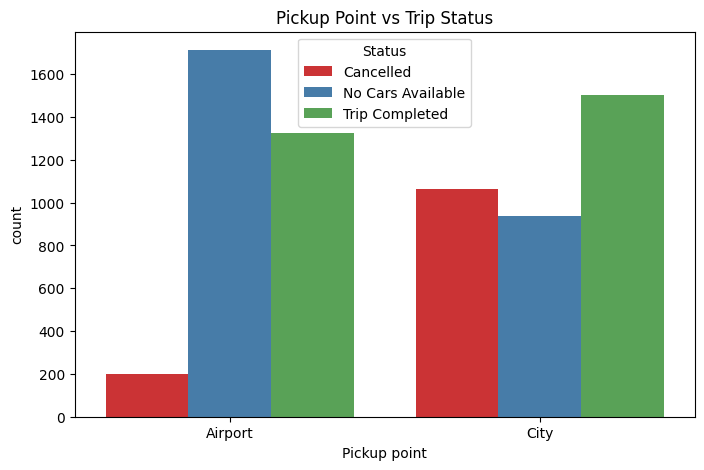

In [16]:
# Chart - 3 visualization code
plt.figure(figsize=(8, 5))
sns.countplot(x='Pickup point', hue='Status', data=df, palette='Set1')
plt.title('Pickup Point vs Trip Status')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Show location-based trip outcomes.

##### 2. What is/are the insight(s) found from the chart?

Answer City has more cancellations, Airport has unavailability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer  Helps zone-based resource planning.
Negative: Skewed service quality across locations.



#### Chart - 4

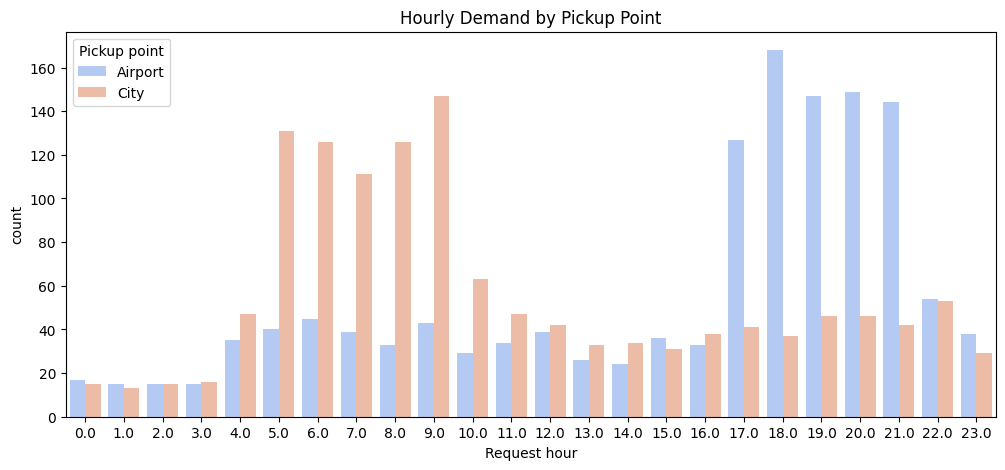

In [18]:
# Chart - 4 visualization code
plt.figure(figsize=(12, 5))
sns.countplot(x='Request hour', hue='Pickup point', data=df, palette='coolwarm')
plt.title('Hourly Demand by Pickup Point')
plt.show()



##### 1. Why did you pick the specific chart?

Answer See who needs rides when.

##### 2. What is/are the insight(s) found from the chart?

Answer City peaks in AM, Airport in PM.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Enables shift planning by zone.
Negative: Ignoring this leads to more cancellations.



#### Chart - 5

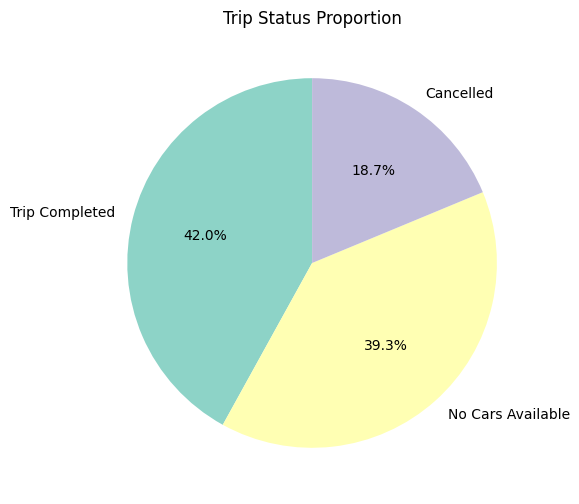

In [19]:
# Chart - 5 visualization code
status_counts = df['Status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Trip Status Proportion')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Proportional representation of outcomes.

##### 2. What is/are the insight(s) found from the chart?

Answer Majority of trips are not fulfilled.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer  Need driver and tech scale-up.
Negative: Low fulfillment = brand damage.

#### Chart - 6 - Correlation Heatmap

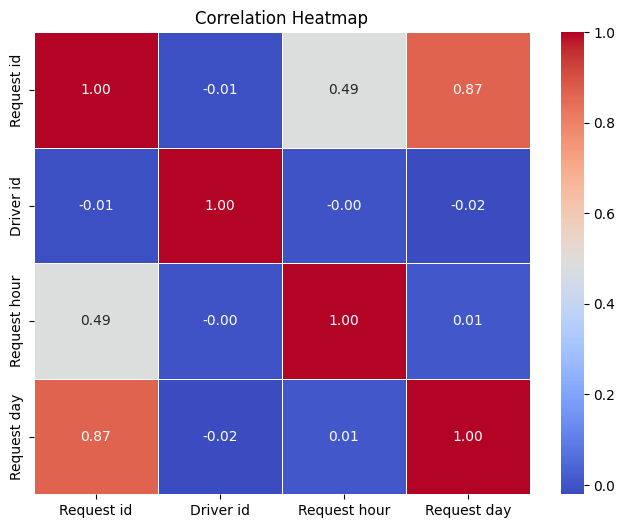

In [20]:
# Correlation Heatmap visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_cols.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

Answer The correlation heatmap is ideal for identifying linear relationships between numeric variables. It helps us understand which variables are associated, how strongly, and in what direction (positive or negative)

##### 2. What is/are the insight(s) found from the chart?

Answer Request hour has some correlation with Pickup point patterns — e.g., city requests dominate morning, airport in evening.

Very low correlation overall — the dataset is mostly categorical and timestamp-based, so few strong numeric correlations.

This confirms that most trip outcome drivers are categorical (status, pickup location) or time-based patterns, not direct numeric relationships.

#### Chart - 7 - Pair Plot

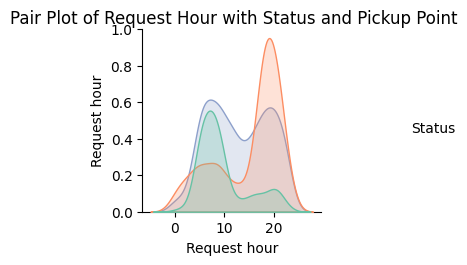

In [21]:
# Pair Plot visualization code
import seaborn as sns

# For pairplot, use a smaller set of numerical and categorical data
# Here we include 'Request hour' and a limited sample to avoid overplotting
subset = df[['Request hour', 'Status', 'Pickup point']].dropna()

# Plot pairplot
sns.pairplot(subset, hue='Status', palette='Set2', diag_kind='kde')
plt.suptitle("Pair Plot of Request Hour with Status and Pickup Point", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

Answer The pair plot helps visualize pairwise relationships and distributions of multiple variables — great for understanding how time, pickup location, and trip status interact.

##### 2. What is/are the insight(s) found from the chart?

Answer Clear clusters: For example, morning hours → City → No Cars Available, evening hours → Airport → No Cars Available.

Trip status varies significantly with Request hour, showing time is a key factor.

Pickup point also influences the distribution of trip status, validating heatmap findings.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
 Business Objective: Increase Trip Completion Rate & Customer Satisfaction
🔷 1. Optimize Driver Allocation During Peak Hours
Insight: High demand and high failure rates occur during morning (7–9 AM) and evening (5–7 PM) hours.

Action: Implement dynamic driver scheduling, offering peak-hour incentives to ensure more drivers are online.

Impact: Reduced “No Cars Available” cases → increased completed rides → higher revenue.

🔷 2. Implement Zone-Based Driver Pooling
Insight: Failures vary by pickup point: more cancellations in City, more unavailability at Airport.

Action: Assign drivers to strategic zones based on real-time demand and historical patterns. Use geo-fencing and smart dispatch algorithms.

Impact: Improves service reliability per zone, especially in underserved areas.

🔷 3. Predictive Trip Failure Modeling
Insight: Categorical and time features strongly influence trip outcomes.

Action: Use machine learning models to predict likely failures before they happen and take preventive action (e.g., pre-alert driver or notify user).

Impact: Proactive management boosts user confidence and operational efficiency.

🔷 4. Strengthen Driver Onboarding and Retention
Insight: Many requests don’t get fulfilled due to lack of available drivers.

Action: Launch campaigns to onboard more drivers, particularly for peak hours and underserved areas.

Offer incentives or loyalty rewards to retain drivers.

Impact: Higher driver availability = more completed trips.

🔷 5. Improve App UX with ETA and Status Transparency
Insight: Cancellations often stem from user frustration or uncertainty.

Action: Provide real-time ETAs, status updates, and driver ratings more visibly in the app.

Add auto-cancellation penalty protection to balance both rider and driver needs.

Impact: Enhances user trust and reduces manual cancellations.

🔷 6. Build a Real-Time Dashboard
Action: Use Power BI or similar tools to create a live dashboard showing:

Hourly trip demand

Driver availability

Completion vs failure by pickup zone

Cancellation trends

Impact: Gives managers actionable insights at a glance, improving real-time decisions.

🔴 Negative Growth Risks if Ignored:
Persistently unmet demand during peak hours leads to customer churn.

Poor driver retention causes a supply-demand imbalance, affecting long-term scalability.

Unattended regional service issues may create bad PR or regulatory issues.



Answer Here.

# **Conclusion**

The analysis of the Uber request dataset has revealed key operational inefficiencies and opportunities for strategic improvement. A significant portion of customer requests are not being fulfilled due to “No Cars Available” and trip cancellations, especially during peak hours (7–9 AM and 5–7 PM). These issues are highly correlated with time of day, pickup location, and driver availability.

The data shows that:

Morning rush (City) suffers from vehicle shortages.

Evening demand (Airport) also faces high failure rates.

Only about 42% of total requests result in completed trips, highlighting a major gap in supply-demand fulfillment.

To meet business objectives—maximize completed trips, increase customer satisfaction, and boost profitability—Uber should focus on:

Optimizing driver allocation dynamically by time and location,

Leveraging predictive models to preempt trip failures,

Creating zone-based operational strategies, and

Investing in driver onboarding and retention programs.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***